In [ ]:
!nvidia-smi

Fri Nov 10 16:00:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as  tf
import torch

In [ ]:
print('Tensorflow版本為:', tf.__version__)
print('Pytorch版本為:', torch.__version__)

Tensorflow版本為: 2.14.0
Pytorch版本為: 2.1.0+cu118


In [ ]:
print("Tensorflow是否可使用GPU:", tf.test.is_gpu_available())
print("Pytorch是否可使用GPU:", torch.cuda.is_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tensorflow是否可使用GPU: True
Pytorch是否可使用GPU: True


# 建立第一個ANN model

In [ ]:
# 建立假資料
import numpy as  np

X_train = np.random.random((1000,3))
y_train = np.random.randint(2, size=(1000,1))

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# x_train 和 y_train 是 Numpy 数组 -- 就像在 Scikit-Learn API 中一样。
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
32/32 [==============================] - 6s 4ms/step - loss: 0.6939 - accuracy: 0.4760
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5030
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5110
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5120


In [ ]:
model.evaluate(X_train, y_train)

32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5120


[0.6929816007614136, 0.5120000243186951]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


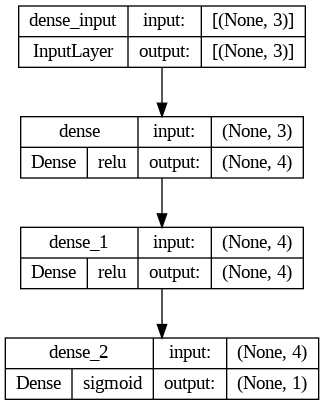

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 產生隨機的訓練資料
X_train = np.random.random((1000, 3))
# Binary labels (0 or 1)
y_train = np.random.randint(2, size=(1000, 1))

# 建立模型
model = Sequential()

# 第一層隱藏層，4個神經元，激活函數為relu
model.add(Dense(4, activation='relu'))

# 第二層隱藏層，4個神經元，激活函數為relu
model.add(Dense(4, activation='relu'))

# 輸出層，使用sigmoid輸出0-1的二元機率
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, epochs=5, batch_size=32)

# 使用評估模型，這邊用訓練資料
scores = model.evaluate(X_train, y_train)
print("accuracy:" , round(scores[1]*100,4),'%')

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5050
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5150
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5090
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5180
accuracy: 51.8 %


# Pytorch版本

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Generate some random data for training
# 1000 samples with 3 features
X_train = torch.rand(1000, 3)
y_train = torch.randint(0, 2, (1000, 1), dtype=torch.float32)

# # Define the neural network
class torchNN(nn.Module):
  def __init__(self):
    super(torchNN, self).__init__()
    self.fc1 = nn.Linear(3, 4)  # 輸入層與第一個隱藏層
    self.fc2 = nn.Linear(4, 4)  # 第二個隱藏層
    self.fc3 = nn.Linear(4, 1)  # 輸出層
  # Apply ReLU activation function
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

# Create the model
model = torchNN()

# Define the loss function and the optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(5):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward pass and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluate the model
with torch.no_grad():
  outputs = model(X_train)
  predicted = (outputs >= 0.5).float()
  accuracy = (predicted == y_train).sum().item() / y_train.size(0)

print(f"\nAccuracy: {accuracy * 100:.2f}%")

Epoch 1, Loss: 0.703974187374115
Epoch 2, Loss: 0.7037410140037537
Epoch 3, Loss: 0.7035107016563416
Epoch 4, Loss: 0.703282356262207
Epoch 5, Loss: 0.703056275844574

Accuracy: 50.30%


In [ ]:
# 評估模型
mse_test = model_keras.evaluate(X_test, y_test)
print(f'Test MSE: {mse_test[0]:.4f}')

129/129 [==============================] - 1s 4ms/step - loss: 0.6204 - mean_squared_error: 0.6204
Test MSE: 0.6204


In [ ]:
model_keras.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_19 (Dense)            (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 比較LGBM模型

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train, y_train)

# 模型參數
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression', #數值預測
    'metric': {'mse'},
    'num_leaves': 32, #葉子最大數量，複雜程度
    'learning_rate': 0.01 #
}

# 訓練模型
gbm = lgb.train(params,
          lgb_train,
          num_boost_round=100 #樹的數量
          )


# 預測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
mse_test = mean_squared_error(y_test, y_pred)
print(f'The mean squared error (MSE) on test set: {mse_test}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
The mean squared error (MSE) on test set: 0.514552079425033


## Pytorch版本

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 建立模型
class torchLIN(nn.Module):
    def __init__(self, input_dim):
        super(torchLIN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x

# 數據轉為張量
tensor_x_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train.values)
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.values)

tensor_train = TensorDataset(tensor_x_train, tensor_y_train)
tensor_test = TensorDataset(tensor_x_test, tensor_y_test)

# 建立訓練及測試資料集
train_loader = DataLoader(dataset=tensor_train, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=tensor_test, batch_size=32, shuffle=False)

# 輸入模型
model = torchLIN(input_dim=X_train.shape[1])

# 定義優化器及損失函數
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# 訓練模型
n_epochs = 30

for epoch in range(n_epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}: Loss: {loss.item():.4f}')

# 測試模型
model.eval()
test_loss = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()

test_loss /= len(test_loader.dataset)
print(f'Test MSE: {test_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: Loss: 1.7277
Epoch 2: Loss: 1.6748
Epoch 3: Loss: 1.4424
Epoch 4: Loss: 1.8637
Epoch 5: Loss: 1.4910
Epoch 6: Loss: 1.2161
Epoch 7: Loss: 1.3130
Epoch 8: Loss: 1.3533
Epoch 9: Loss: 0.9126
Epoch 10: Loss: 1.0960
Epoch 11: Loss: 1.6403
Epoch 12: Loss: 1.5278
Epoch 13: Loss: 1.0963
Epoch 14: Loss: 1.2630
Epoch 15: Loss: 1.1440
Epoch 16: Loss: 1.4228
Epoch 17: Loss: 2.0711
Epoch 18: Loss: 1.2349
Epoch 19: Loss: 0.7814
Epoch 20: Loss: 1.2491
Epoch 21: Loss: 1.5895
Epoch 22: Loss: 1.1770
Epoch 23: Loss: 0.7650
Epoch 24: Loss: 1.6206
Epoch 25: Loss: 1.3720
Epoch 26: Loss: 1.3792
Epoch 27: Loss: 0.5647
Epoch 28: Loss: 0.8739
Epoch 29: Loss: 1.6053
Epoch 30: Loss: 1.4647
Test MSE: 0.0409
